## Primeiro programa

Regressão logística (Prevendo se devo usar casaco ou não a partir da temperatura)

Abaixo temos um conjunto de dados inseridos manualmente que identificam a temperatura e o uso ou não de casaco. Com base nesses dados, vamos ajustando nosso modelo de regressão liner, de maneira que ele consegue prever se o uso de casaco é necessário ou não para outras temperaturas que não foram usadas no treinamento.

In [2]:
from sklearn.linear_model import LogisticRegression

temp = [[30], [25], [15], [17], [27], [20]]
casaco = [False, False, True, True, False, True]

classifier = LogisticRegression()
classifier.fit(temp, casaco)

temp_teste = [[22], [1], [26], [15], [24], [10], [8]]
classifier.predict(temp_teste)

array([ True,  True, False,  True, False,  True,  True])

## Segundo programa

Descobrindo o nível de felicidade de pessoas de um país a partir do PIB.

Primeiro importamos a primeira base de dados (referente aos países e o PIB de cada um) e damos uma olhada nos cinco primeiros dados:

In [3]:
import pandas as pd

money_df = pd.read_csv("money.csv")
money_df.head()

,Country,GDP
0,Australia,50961.865
1,Austria,43724.031
2,Belgium,40106.632
3,Belize,4841.735
4,Bolivia,2886.231


Agora importamos a segunda base de dados, que diz respeito ao nível de felicidade de cada país:

In [4]:
happiness_df = pd.read_csv("happiness.csv")
happiness_df.head()

,Country,Happiness
0,Australia,7.5
1,Austria,7.6
2,Belgium,7.3
3,Brazil,6.6
4,Canada,7.6


Agora fazemos o merge dos dois dataframe, isto é, usamos a coluna em comum nos dois dataframes, que é a coluna Country, e fazemos uma junção nelas. As demais colunas serão inseridas de acordo com a informação de cada país que vai aparecendo no dataframe:

In [5]:
dataframe_merge = pd.merge(happiness_df, money_df, on='Country', how='inner')
dataframe_merge.head(10)

,Country,Happiness,GDP
0,Australia,7.5,50961.865
1,Austria,7.6,43724.031
2,Belgium,7.3,40106.632
3,Brazil,6.6,8669.998
4,Canada,7.6,43331.961
5,Chile,5.7,13340.905
6,Colombia,6.3,6083.510
7,Czech Republic,6.7,17256.918
8,Denmark,7.9,52114.165
9,Estonia,5.4,17288.083


Visualizando os dados referentes a felicidade em função do PIB:

<AxesSubplot:xlabel='GDP', ylabel='Happiness'>

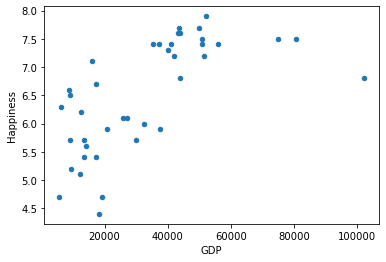

In [6]:
dataframe_merge.plot(kind='scatter', x='GDP', y='Happiness')

Antes de prosseguir, precisamos ajustar os dados em X, pois o método usado para treinar o modelo exige que esses dados estejam em uma matriz bidimensional:

In [30]:
import numpy as np

x = np.array(dataframe_merge['GDP']).reshape(-1,1)

y = dataframe_merge['Happiness']

Treinamos o modelo de regressão linear proveniente da biblioteca sklearn usando a função LinearRegression, que recebe como parâmetros os valores ajustados na célula anterior:

In [8]:
# Treinando o modelo a partir dos dados mergeados no dataframe.
# O modelo escolhido foi o de regressão linear

from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(x, y)

LinearRegression()

Plotando o gráfico e comparando os dados com o ajuste estatístico proposto pelo modelo:

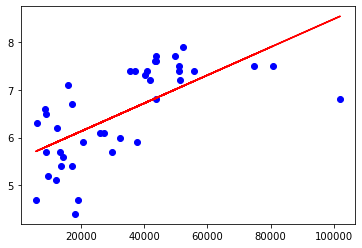

In [9]:
import matplotlib.pyplot as plt

prediction_y = linear_regression_model.predict(x)

plt.scatter(x, y, color='blue')
plt.plot(x, prediction_y, color='red')
plt.show()

Fazendo testes:

In [10]:
dado_teste = [[30000.865]]
linear_regression_model.predict(dado_teste)

array([6.42394302])

In [11]:
dado_teste2 = [[13588.84]]
linear_regression_model.predict(dado_teste2)

array([5.94150885])

## Terceiro programa

Classificando se peixes são obesos ou não com base na altura e no peso de cada um.

Primeiro importamos os dados:

In [12]:
import pandas as pd

fish_obesity_df = pd.read_csv("fish obesity.csv")
fish_obesity_df.head()

,Height,Weight,Obese
0,174,96,1
1,189,87,0
2,185,110,1
3,195,104,0
4,149,61,0


Identificamos as features e as labels que serão utilizadas para o treinamento do modelo e as guardamos em variáveis:

In [13]:
labels = fish_obesity_df['Obese']
features = fish_obesity_df[['Height','Weight']]

Uma boa prática é separar os dados de forma que uma parte seja destinada ao treino e outra parte seja destinada a teste. Para fazer isso, o sklearn tem um método chamado train_test_split, com o qual foi possível separar os dados em 80% para treino e 20% para teste, conforme o especificado no parâmetro test_size=0.2:

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

Treinamos o modelo:

In [15]:
from sklearn.svm import SVC

classifier = SVC(random_state=42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

Plotando o gráfico para melhor visualização:

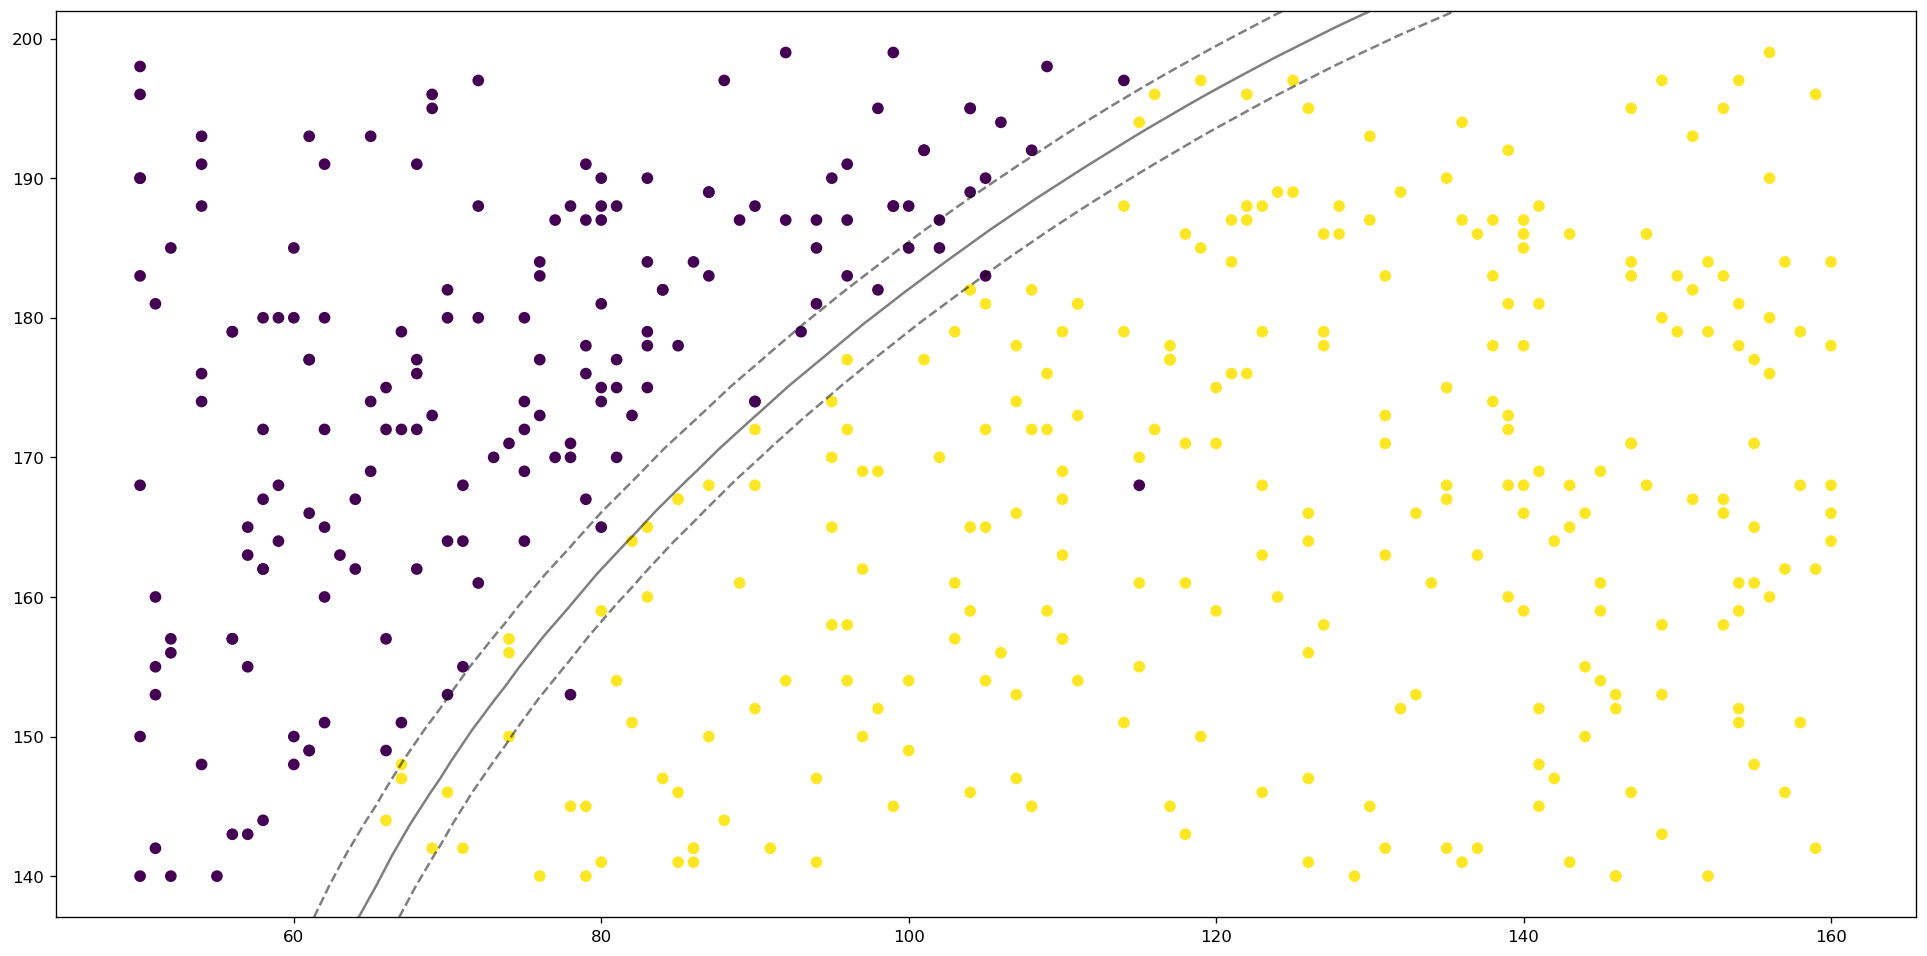

In [16]:
import numpy as np
from matplotlib import pyplot as plt

x = X_train['Weight']
y = X_train['Height']
label = y_train

plt.figure(figsize=(20, 10), dpi=120)
plt.scatter(x, y, c=label, cmap='viridis')

# The code below was copied from: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = classifier.decision_function(xy).reshape(X.shape)

# plot decision boundary and margins
ax.contour(X, Y, P, colors='k',
            levels=[-0.05, 0, 0.05], alpha=0.5,
            linestyles=['--', '-', '--'])

Testando:

In [17]:
new_fish = [[163, 64]]
classifier.predict(new_fish)

array([0], dtype=int64)

Plotando a matriz de confusão:

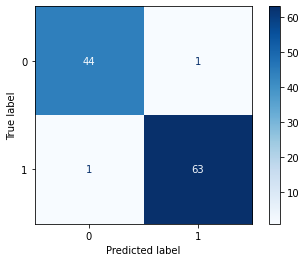

In [18]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)

Calculando os indicadores:

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print(classification_report(y_test,y_pred))

# Acurácia, ou: em geral, qual o percentual de acerto?
accuracy = (tp + tn) / (tp + tn + fp + fn)
print ("accuracy", accuracy)

#Precision, ou: entre os que previ serem positivos, qual o percentual de acerto?
precision = tp / (tp + fp)
print ("precision", precision)

#Recall, ou: entre os que são positivos, qual o percentual de acerto?
recall = tp / (tp + fn)
print ("recall", recall)

#f1 score: media harmônica de Precision e Recall
f1_score = 2 * ((precision * recall) / (precision + recall))
print ("f1_score", f1_score)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.98      0.98      0.98        64

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109

accuracy 0.981651376146789
precision 0.984375
recall 0.984375
f1_score 0.984375


## Quarto programa

Fazendo agrupamento de dados (usando k-means) que foram gerados artificialmente através do método make_blobs

Primeiro geramos os dados e depois plotamos na tela para visualizar:

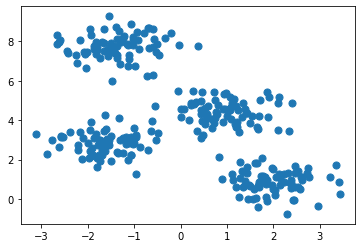

In [20]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(x=X[:,0], y=X[:,1], s=50)

Vamos usar o k-means para agrupar os dados gerados:

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

Uma vez feito o treinamento, é hora do modelo tentar fazer as predições, as quais são armazenadas na variável y_kmeans:

In [22]:
y_kmeans = kmeans.predict(X)

Visualizando o resultado através de um gráfico:

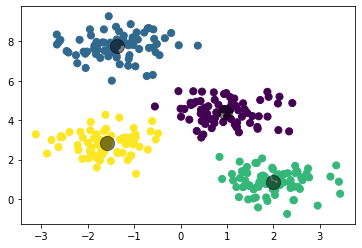

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Quinto programa

Usando random forest para verificar se o dinheiro é genuíno ou não

Primeiro importamos a base de dados:

In [32]:
import pandas as pd

money_df = pd.read_csv("banknote_data.csv")
money_df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Fazemos a separação das variáveis necessárias para treinar o modelo:

In [35]:
X = money_df[["Variance", " Skewness", " Curtosis", " Entropy"]].values
y = money_df[" Class"].values

Dividimos os dados em 80% para treino e 20% para teste:

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Treinamos o modelo:

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

Calculamos e mostramos os indicadores:

In [40]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()

print(tp, fp, tn, fn)
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test, y_predict))

122 0 153 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

1.0
